<a href="https://colab.research.google.com/github/techbala1590/weekly-task/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Case Study: Student Performance Analysis
# Objective:
# The goal of this case study is to analyze the factors influencing student performance using a real-world dataset. The students will load, clean, and explore the dataset to derive meaningful insights through Exploratory Data Analysis (EDA).
# ________________________________________
# Dataset Overview:
# The dataset contains information on students, including demographics, academic performance, attendance, study habits, stress levels, and other external factors.
# Columns Description:
# Column Name	Description
# Student_ID	                          Unique ID for each student
# First_Name, Last_Name, Email	        Student details
# Gender	                              Gender of the student
# Age	                                  Age of the student
# Department	                          Academic department
# Attendance (%)	                      Percentage of attendance
# Midterm_Score	                        Score obtained in midterms
# Final_Score	                          Score obtained in finals
# Assignments_Avg	                      Average score of assignments
# Quizzes_Avg	                          Average score of quizzes
# Participation_Score	                  Score based on class participation
# Projects_Score	                      Score obtained in projects
# Total_Score	                          Final computed score
# Grade	                                Grade achieved
# Study_Hours_per_Week	                Time spent studying per week
# Extracurricular_Activities	          Whether student participates in extracurricular activities (Yes/No)
# Internet_Access_at_Home	              Does the student have internet access at home? (Yes/No)
# Parent_Education_Level	              Highest education level of parents
# Family_Income_Level	                  Socio-economic background of the student
# Stress_Level (1-10)	                  Self-reported stress level (1 = low, 10 = high)
# Sleep_Hours_per_Night	                Average hours of sleep per night
# ________________________________________
# Case Study Questions:
# The students must answer the following questions by applying Pandas, NumPy, and data visualization techniques:
# 1. Data Loading & Cleaning (Initial Exploration)
# •	Load the dataset using Pandas and check the first five rows.
# •	Check for missing values and decide how to handle them.
# •	Identify data types for each column and convert them if necessary.
# •	Remove unnecessary columns (Tip: It could be student personal information like First_Name, Last_Name, Email).
# ________________________________________

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

students = pd.read_csv('/content/drive/MyDrive/sirpi/Students_Grading_Dataset.csv')
students.head()

students.isnull().sum()
students.dropna(axis=0,inplace=True)
students.head()
students.isnull().sum()
students.info()
students.head()

students.drop(['First_Name','Last_Name','Email'],axis=1,inplace= True)
students.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 2581 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  2581 non-null   object 
 1   First_Name                  2581 non-null   object 
 2   Last_Name                   2581 non-null   object 
 3   Email                       2581 non-null   object 
 4   Gender                      2581 non-null   object 
 5   Age                         2581 non-null   int64  
 6   Department                  2581 non-null   object 
 7   Attendance (%)              2581 non-null   float64
 8   Midterm_Score               2581 non-null   float64
 9   Final_Score                 2581 non-null   float64
 10  Assignments_Avg             2581 non-null   float64
 11  Quizzes_Avg            

,Student_ID,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
2,S1002,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
8,S1008,Female,21,CS,85.97,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8


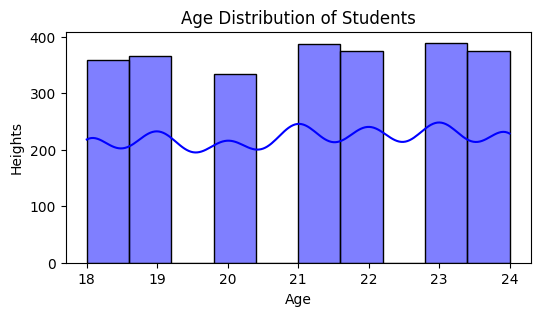

,Study_Hours_per_Week
Department,
Business,17.929528
CS,17.848536
Engineering,17.406202
Mathematics,16.606250


In [2]:
# 2. Descriptive Statistics & Understanding Data
# •	What are the summary statistics (mean, median, std, min, max) of Midterm_Score, Final_Score, and Total_Score?
# •	Find the age distribution of students in the dataset.
# •	Count the number of students in each Department.
# •	What is the average Study Hours per Week for students in different departments?
# ________________________________________

summary_statistics = students[['Midterm_Score','Final_Score','Total_Score']].describe()
summary_statistics

plt.figure(figsize=(6, 3))
sns.histplot(students['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Heights')
plt.show()

students['Department'].value_counts()

students.groupby('Department')['Study_Hours_per_Week'].mean()

Factors most correlated with Total_Score:


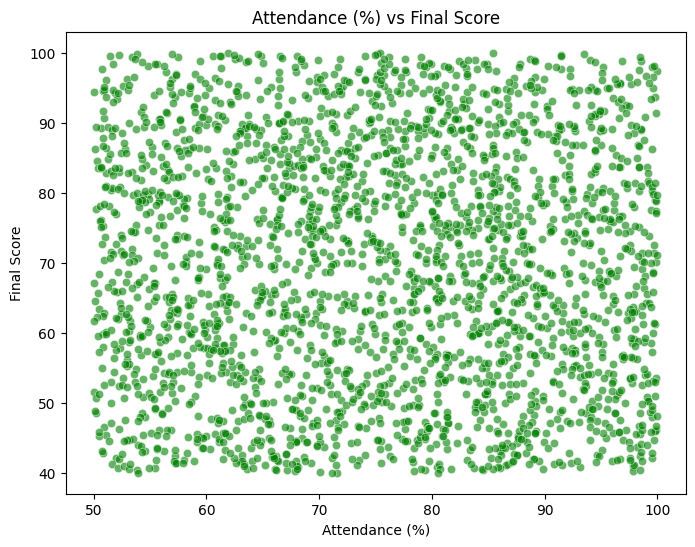

Impact of Extracurricular Participation on Total Score:


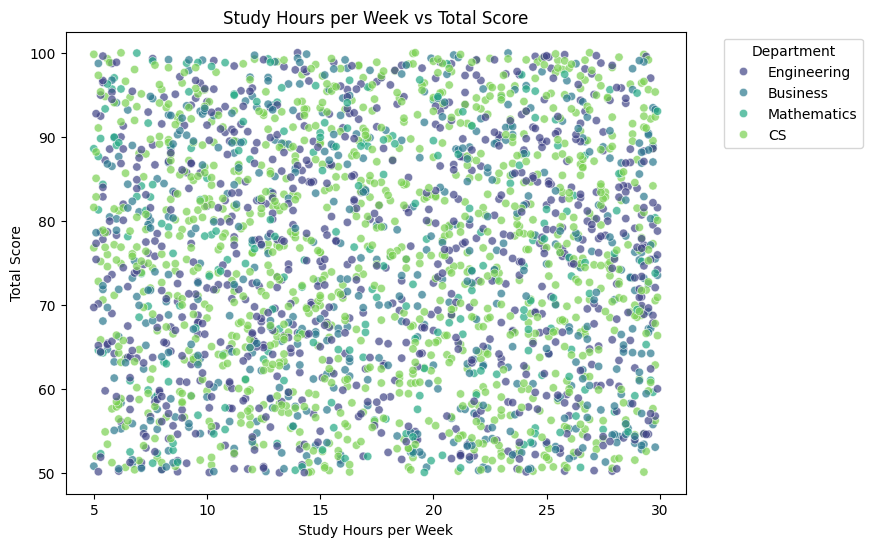

In [3]:
# 3. Academic Performance Analysis
# •	Which factors correlate most with Total_Score?
# •	How does Attendance (%) impact Final Scores?
# o	(Use a scatter plot to visualize)
# •	Does participation in extracurricular activities affect academic performance?
# •	Find out if students who study more hours per week score better in exams.
# o	(Create a visualization to compare Study_Hours_per_Week and Total_Score)
# ________________________________________
numerical_students = students.select_dtypes(include=np.number)
correlation_with_total_score = numerical_students.corr()['Total_Score'].sort_values(ascending=False)

print("Factors most correlated with Total_Score:")
correlation_with_total_score
plt.figure(figsize=(8, 6))

sns.scatterplot(data=students, x='Attendance (%)', y='Final_Score', color='green', alpha=0.6)
plt.title('Attendance (%) vs Final Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Final Score')
plt.show()

extracurricular_performance = students.groupby('Extracurricular_Activities')['Total_Score'].mean()
print("Impact of Extracurricular Participation on Total Score:")
extracurricular_performance

plt.figure(figsize=(8, 6))
sns.scatterplot(data=students, x='Study_Hours_per_Week', y='Total_Score', hue='Department', palette='viridis', alpha=0.7)
plt.title('Study Hours per Week vs Total Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Average Total Score by Parent Education Level:
Impact of Internet Access on Academic Performance:
Average Total Score by Family Income Level:


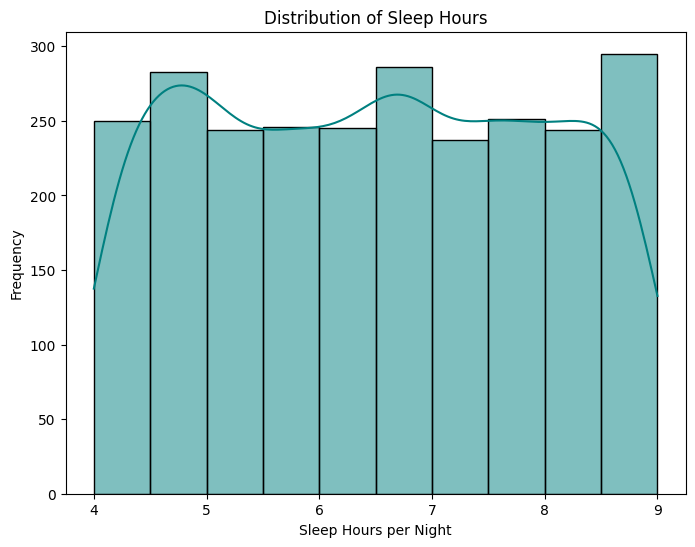

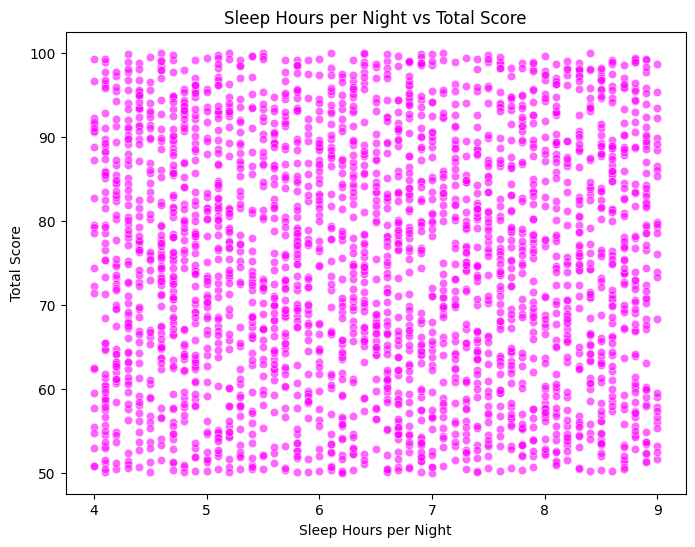

In [4]:
# 4. Social & Economic Factors Analysis
# •	Is there a relationship between Parent Education Level and Student Performance?
# •	Do students with Internet Access at Home perform better academically?
# •	Compare the performance of students from different Family Income Levels.
# •	Analyze the effect of Sleep Hours per Night on academic performance.
# o	(Plot a histogram to understand the distribution)
# ________________________________________

parent_education_performance = students.groupby('Parent_Education_Level')['Total_Score'].mean()
print("Average Total Score by Parent Education Level:")
parent_education_performance

internet_access_performance = students.groupby('Internet_Access_at_Home')['Total_Score'].mean()
print("Impact of Internet Access on Academic Performance:")
internet_access_performance

income_level_performance = students.groupby('Family_Income_Level')['Total_Score'].mean()
print("Average Total Score by Family Income Level:")
income_level_performance

plt.figure(figsize=(8, 6))
sns.histplot(students['Sleep_Hours_per_Night'], bins=10, kde=True, color='teal')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Sleep Hours vs Total Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=students, x='Sleep_Hours_per_Night', y='Total_Score', color='magenta', alpha=0.6)
plt.title('Sleep Hours per Night vs Total Score')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Total Score')
plt.show()

Correlation between Stress Level and Final Score: -0.02


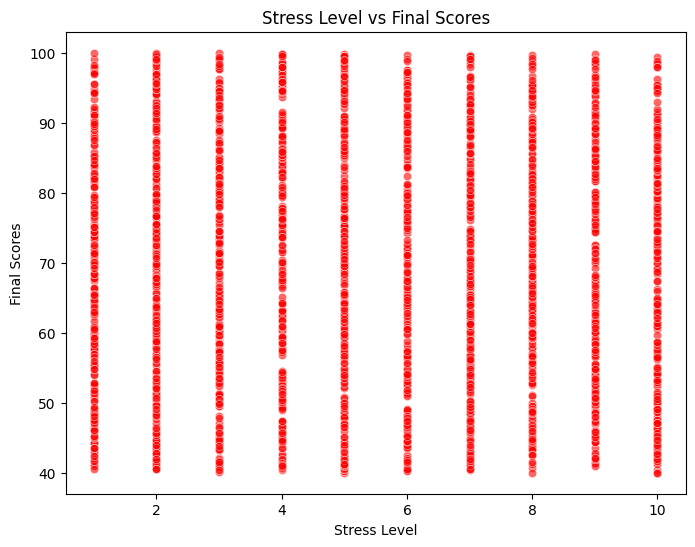

Average Final Score for students sleeping <5 hours: 69.76
Average Final Score for students sleeping >=5 hours: 69.49
High-Stress, High-Performing Students:
Shared Characteristics:


,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,371.000000,371.000000,371.00000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,20.951482,75.634313,70.22372,69.107520,74.965526,74.287224,5.026065,74.414609,87.132399,17.353369,8.964960,6.507817
std,2.036907,13.994851,16.90003,17.033567,14.832818,14.782863,2.837216,14.468093,7.330493,7.163983,0.832684,1.456919
min,18.000000,50.030000,40.03000,40.000000,50.360000,50.030000,0.040000,50.210000,75.170000,5.000000,8.000000,4.100000
25%,19.000000,64.380000,54.78000,53.525000,61.940000,61.460000,2.720000,61.125000,80.450000,11.250000,8.000000,5.200000
50%,21.000000,76.290000,69.14000,68.060000,74.940000,74.050000,5.000000,73.810000,86.830000,16.900000,9.000000,6.500000
75%,23.000000,86.700000,85.09000,84.100000,88.025000,87.670000,7.605000,86.995000,93.500000,24.000000,10.000000,7.700000
max,24.000000,99.860000,99.91000,99.860000,99.670000,99.930000,9.990000,99.570000,99.990000,29.900000,10.000000,9.000000


In [5]:
# 5. Stress & Health Impact
# •	Is there a correlation between Stress Level and Final Scores?
# •	Find out if students who sleep less than 5 hours per night perform worse than others.
# •	Identify students who have high stress levels (>7) but high academic performance.
# o	(What characteristics do they share?)
# ________________________________________
stress_final_score_corr = students['Stress_Level (1-10)'].corr(students['Final_Score'])
print(f"Correlation between Stress Level and Final Score: {stress_final_score_corr:.2f}")


plt.figure(figsize=(8, 6))
sns.scatterplot(data=students, x='Stress_Level (1-10)', y='Final_Score', color='red', alpha=0.6)
plt.title('Stress Level vs Final Scores')
plt.xlabel('Stress Level')
plt.ylabel('Final Scores')
plt.show()

low_sleep = students[students['Sleep_Hours_per_Night'] < 5]
other_sleep = students[students['Sleep_Hours_per_Night'] >= 5]

# Calculate average Final Scores for both groups
low_sleep_avg = low_sleep['Final_Score'].mean()
other_sleep_avg = other_sleep['Final_Score'].mean()

print(f"Average Final Score for students sleeping <5 hours: {low_sleep_avg:.2f}")
print(f"Average Final Score for students sleeping >=5 hours: {other_sleep_avg:.2f}")


high_stress_high_performance = students[(students['Stress_Level (1-10)'] > 7) & (students['Total_Score'] > students['Total_Score'].median())]
print("High-Stress, High-Performing Students:")
high_stress_high_performance

# Analyze shared characteristics
shared_characteristics = high_stress_high_performance.describe()
print("Shared Characteristics:")
shared_characteristics

<ipython-input-6-47680827a23d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=students, x='Department', y='Total_Score', palette='pastel')


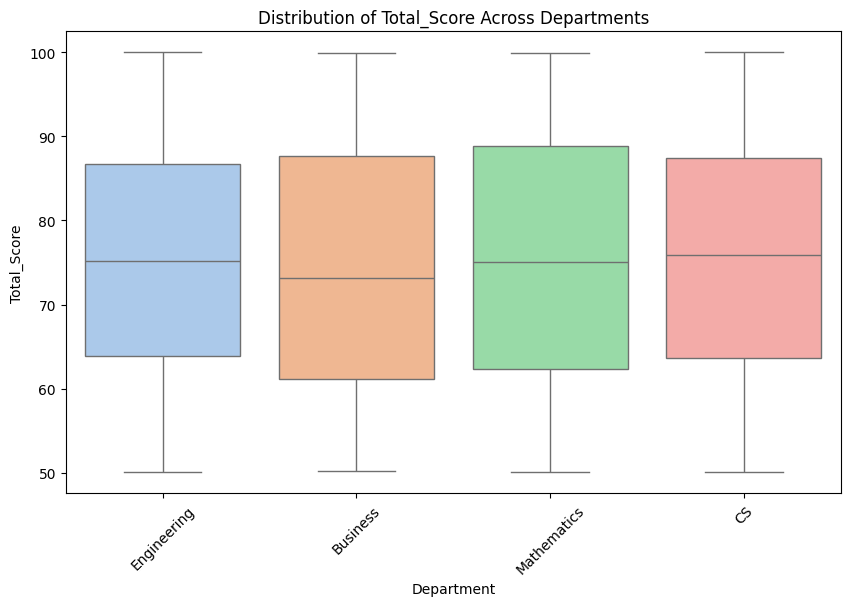

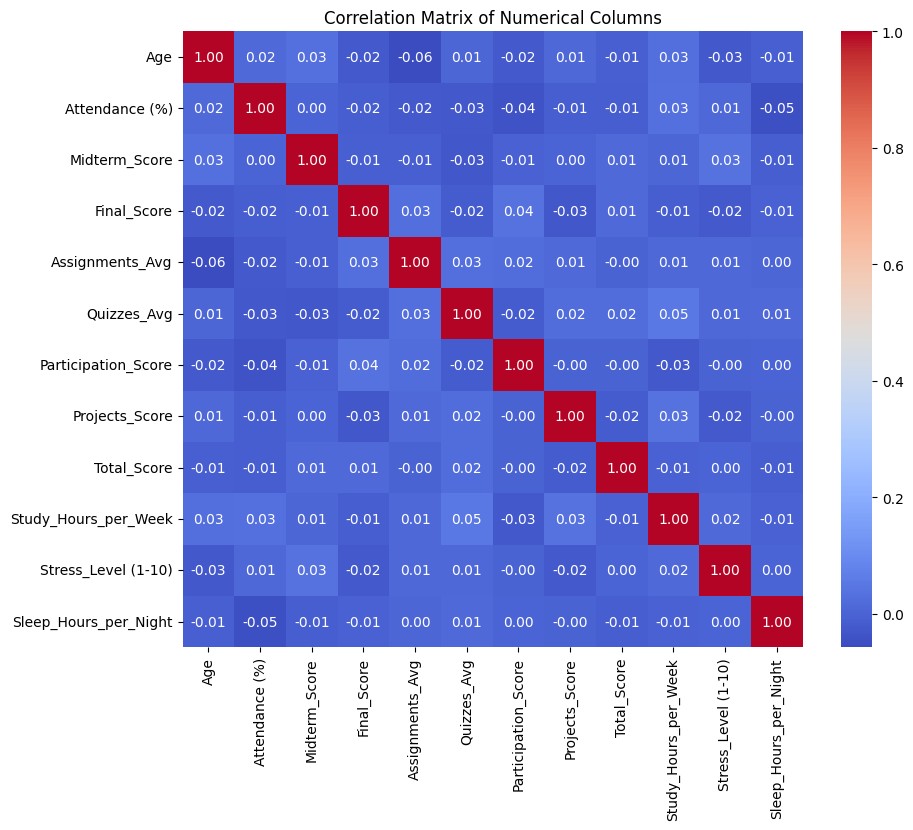

Top 5 Students Based on Total_Score:
     Student_ID  Gender  Age   Department  Attendance (%)  Midterm_Score  \
330       S1330    Male   22  Engineering           97.34          66.42   
911       S1911  Female   20           CS           97.61          58.46   
2140      S3140    Male   23           CS           66.14          88.52   
2632      S3632  Female   23           CS           58.03          89.46   
152       S1152    Male   23     Business           57.73          52.68   

      Final_Score  Assignments_Avg  Quizzes_Avg  Participation_Score  \
330         80.67            69.30        61.28                 1.43   
911         95.58            54.63        93.39                 2.17   
2140        40.36            83.78        63.62                 7.96   
2632        79.08            85.13        83.45                 4.28   
152         85.27            94.24        79.71                 3.02   

      Projects_Score  Total_Score Grade  Study_Hours_per_Week  \
330     

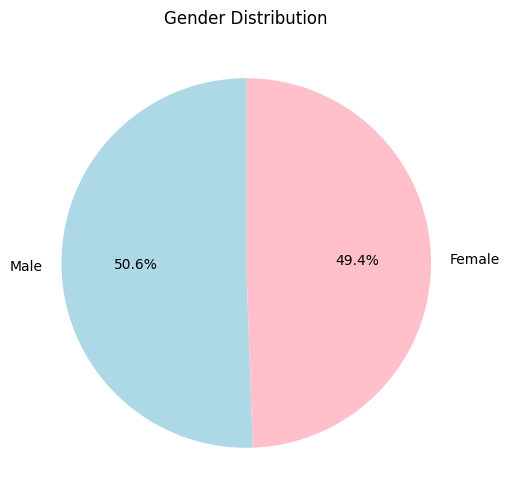

In [6]:
# 6. Visualization & Insights
# •	Create a boxplot to show the distribution of Total_Score across different departments.
# •	Use a heatmap to visualize the correlation matrix of numerical columns.
# •	Identify the top 5 students based on Total_Score.
# •	Show the gender distribution in the dataset.
# ________________________________________


plt.figure(figsize=(10, 6))
sns.boxplot(data=students, x='Department', y='Total_Score', palette='pastel')
plt.title('Distribution of Total_Score Across Departments')
plt.xlabel('Department')
plt.ylabel('Total_Score')
plt.xticks(rotation=45)
plt.show()

numerical_columns = students.select_dtypes(include=np.number).columns

correlation_matrix = students[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

top_students = students.sort_values(by='Total_Score', ascending=False).head(5)
print("Top 5 Students Based on Total_Score:")
print(top_students)

gender_counts = students['Gender'].value_counts()


plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'], labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()